In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import factorial
import random

# **PHYS 481 - Midterm**
### **Josh Houghton**


---

---



### **Introduction**

I have formatted this midterm in a similar manner to that of my assignments. Each of the three problems are broken into separate sections, each of which contain a methodology cell, any relevant code cells, as well as a results/discussion cell. 

## **Problem 1 - Entropy of the Biased Coin**

### **Methodology**

For this problem, I was tasked with creating a program that would randomly flip a biased coin, for a range of different probability biases. In particular the probability of heads, here on denoted by $p$ was varied in the range 0.05 to 0.5, in increments of 0.05. Thus, the probability of flipping tails was also varied, given by $q=1-p$. For each version of the biased coin, the result of the flip was computed and stored for $N=10000$ flips, a number which I deemed to be sufficiently large to obtain the desired results. To do this as efficiently as possible, I ran the bulk of my program in a for loop, which iterated through all different probabilities. 

For each coin, I was also tasked with calculating both the experimental, and theoretical Shannon entropies. To do so, I initially defined a function called shannon, which took three arguements; p, q, and N. Within the function, entropy is calculated and returned according to the basic Shannon entropy definition. Therefore, for the theoretical entropies, all that was necessary was for me to do was pass the actual $p$ and $q$ values of each coin in to the function. In order to calculate the experimental entropies however, an extra step had to be taken, which involved calculating the experimental probabilities. This was done quite simply, as I had all of the results of each 10000 coin flips conveniently stored in a list. To calculate the experimental probabilities, all that had to be done was use Python's list.count function, to obtain the number of heads and tails present in the results, and then divide them each by the total number of trials. The resulting probabilities of heads and tails could then be passed in to the shannon function.

As mentioned, all of this was done within a for loop, which also included printing instructions to output the results for each of the individual coin biases.

### **Code**

In [ ]:
# defining function to calculate the shannon entropy
def shannon(p, q, N):
  ent = 0
  for flip in range(N):
    ent -= (p*math.log(p,2) + q*math.log(q,2))
  return ent

# initializing the number of coin flips N, and a list of probabilities to cycle through
N = 10000
p_list = np.round(np.arange(0.05,0.55,0.05),2)


print("Results for N =",N)
print("===============================")
# for loop to iterate through each of the probabilities
for p in p_list:
  q = 1 - p
  result_list = [] # list to track results of each flip

  # randomly flips a coin N times according to each probability
  for flip in range(N):
    result = np.random.choice(['H','T'],p=[p,q])
    result_list += [result]

  # calculates the experimental probabilities of heads and tailes
  headcount = result_list.count("H")
  tailcount = result_list.count("T")
  head_prob = headcount / N
  tail_prob = tailcount / N

  # calculates the experimental and theoretical probabilities using shannon function
  exp_ent = round(shannon(head_prob, tail_prob, N),3)
  theor_ent = round(shannon(p,q,N),3)
  print("For p =",p,"\tExperimental Entropy:",exp_ent)
  print("\t\tTheoretical  Entropy:", theor_ent)
  print("")   # more printing instructions

Results for N = 10000
For p = 0.05 	Experimental Entropy: 2782.704
		Theoretical  Entropy: 2863.97

For p = 0.1 	Experimental Entropy: 4778.091
		Theoretical  Entropy: 4689.956

For p = 0.15 	Experimental Entropy: 6170.502
		Theoretical  Entropy: 6098.403

For p = 0.2 	Experimental Entropy: 7308.373
		Theoretical  Entropy: 7219.281

For p = 0.25 	Experimental Entropy: 8141.186
		Theoretical  Entropy: 8112.781

For p = 0.3 	Experimental Entropy: 8743.374
		Theoretical  Entropy: 8812.909

For p = 0.35 	Experimental Entropy: 9345.138
		Theoretical  Entropy: 9340.681

For p = 0.4 	Experimental Entropy: 9678.89
		Theoretical  Entropy: 9709.506

For p = 0.45 	Experimental Entropy: 9916.322
		Theoretical  Entropy: 9927.745

For p = 0.5 	Experimental Entropy: 9999.389
		Theoretical  Entropy: 10000.0



### **Results & Discussion**

In the above cell, one will see that all of the desired results have been succesfully obtained. In particular, for each of the probabilities, my program was able to compute both the experimental and theoretical Shannon entropies.

In analyzing these results, one will also find that they are perfectly in line with what is expected for this experiment. First and foremost, all of the experimental entropies are very close (but not exactly the same) to those that are expected theoretically. I created the program such that each of the entropies was an accurate representation of how many bits are required to store/represent the results of all 10000 coin tosses. To check the validity of this, one must consider the idea that for a coin flip, we may represent a result of heads with a 0 and that of tails with a 1. Each 1 or 0 takes up 1 bit, and therefore, when we compute the outcome of $N$ coin flips, the result is a bitstring of length $N$ bits. However, depending on how the bits are arranged, it is possible to represent the same result using a different number of bits.

Knowing this, one can easily check my results to make sure that everything has been properly calculated. The easiest way to do so, is to observe my results for the case of the unbiased coin, in which $p=q=0.5$. In this case, theoretically, one would expect to observe 5000 1's and 5000 0's for $N=10000$ flips. Therefore, to represent the entire set of results, one would need exactly the same number of each of the two different bit values. In this case, we cannot represent this result in any other way other than having exactly 5000 bits of value 0 and 5000 of value 1. Thus, we arrive at the confirmation that our theoretical Shannon entropy is simply equal to $N$ in this case, which we see to hold true for my program's computations. The reason for the slight variation in the *experimental* Shannon entropy is due to the simple fact that it is pretty unlikely to actually observe exactly $N/2$ heads and $N/2$ tails, despite the fact that this is what the probability suggests. Therefore, it is expected that the experimental result, especially for a sufficiently large $N$, would be a different bit string than that expected in theory. In particular this bit string may be represented in less total bits than the theoretical, which is why we see that slight variation.



## **Problem 2 - Biased Coin Distribution Functions**

### **Methodology**

In this problem, I was given several tasks, the first of which was to calculate the macrostate probability for a biased coins, whose bias ranged in the same manner to that of the previous problem. To do this, I defined a simple function called macrostate, which took the number of coin flips $N$, and the probabilities of heads and tails as arguements. Within the function, I used these values to calculates the macrostate probability for all "states" $n_i$. After this was completed, the function output two lists, one containing all of the $n$ values, and the other containing the respective probabilities for each $n$. 

This was very similar to the method employed in my assignment 2 solution. However, this time I did this same thing for multiple probabilities. To do so, I used the same method as was done in Problem 1, of iterating a for loop through all different probability values. With each iteration, I add the plot for the current $p$ value on, so that the results is a single plot with all 7 functions overlayed.

The next task was to compute the means and widths of each distribution function. This was done quite simply, so I included it in the same code cell, within the for loop for plotting. I opted to calculate both the theoretical and experimental values for these parameters, all of which was done easily in Python, using the following four definitions.

$$\mu_{\text{theor.}}=Np$$

$$\mu_{\text{exp.}}=\sum_{i=1}^N{p_in_i}$$

$$\sigma_{\text{theor.}}=\sqrt{Npq}$$

$$\sigma_{\text{exp.}}=\sqrt{\sum_{i=1}^N{p_i(n_i-\mu)^2}}$$

For the third and final task in this problem, I had to repeat a similar set of calculations, but this time for probabilities in the range of 0.01 and 0.1 in increments of 0.01. After doing so, I had to create a log-log plot of the distribution width as a function of $p$. To do this I simply made the necessary changes to the previous part's code to account for the change in probabilities, as well as getting rid of the plotting instructions. Then, after each width was calculated, I calculated it's log, and stored these in a list. Finally, I produced a plot of these values against the logs of their respective probabilities. For analysis, I fitted the data to a line, for which I was able to find and print the equation.


### **Code**

		Theoretical Mean	Experimental Mean	Theoretical Width	Experimental Width
p = 0.05 	 10.0 		   9.999999999999917 	 3.082207001484488 	 3.082207001484476
p = 0.1 	 20.0 		   20.000000000000107 	 4.242640687119285 	 4.242640687119298
p = 0.15 	 30.0 		   29.99999999999984 	 5.049752469181039 	 5.049752469181025
p = 0.2 	 40.0 		   40.000000000000455 	 5.656854249492381 	 5.656854249492413
p = 0.25 	 50.0 		   50.00000000000002 	 6.123724356957945 	 6.123724356957946
p = 0.3 	 60.0 		   59.999999999999325 	 6.48074069840786 	 6.480740698407824
p = 0.35 	 70.0 		   69.99999999999997 	 6.745368781616021 	 6.745368781616021
p = 0.4 	 80.0 		   80.00000000000001 	 6.928203230275509 	 6.928203230275511
p = 0.45 	 90.0 		   90.00000000000098 	 7.035623639735145 	 7.035623639735183
p = 0.5 	 100.0 		   100.00000000000001 	 7.071067811865476 	 7.071067811865476


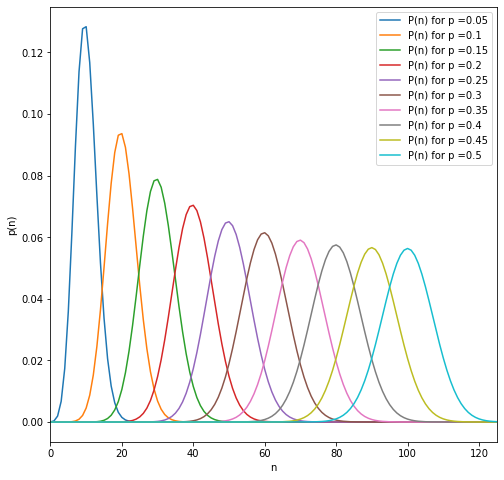

In [ ]:
### Part (a) & (b) ###

# defines a function that calculates all macrostate probabilities for
# a certain system, and outputs the list of probabilities along with the
# corresponding list of systems
def macrostate(N,P,Q):
  n_1 = 0
  P_list = []
  n1_list = []
  for i in range(N+1):
    omega = int((factorial(N)) / ( (factorial(n_1))*(factorial(N-n_1)) ))
    P_macro = omega*(P**n_1)*(Q**(N-n_1))
    P_list.append(P_macro)
    n1_list.append(n_1)
    n_1 += 1
    
  return P_list, n1_list

fig, axs = plt.subplots(1,1, figsize=(8,8))
# initializing N and the list of probabilities
N = 200
p_list = np.round(np.arange(0.05,0.55,0.05),2)

print("\t\tTheoretical Mean\tExperimental Mean\tTheoretical Width\tExperimental Width")
print("==========================================================================================")
# initiates for loop that iterates over each probability,
# in which it calculates and plots the macrostate probability
for prob in p_list:
  q = 1 - prob
  Ps, ns = macrostate(N,prob,q)
  # calculates the mean value
  mean = 0
  #calculates the variance
  var = 0
  for i in range(len(Ps)):
    mean += Ps[i]*ns[i]  
  for i in range(len(Ps)):
      var += Ps[i]*(ns[i]-mean)**2
  #calculates standard deviation (width) from the variance
  stddev = math.sqrt(var)
  # calculates theoretical mean and width
  theor_mean = N*prob
  theor_width = math.sqrt(N*prob*q)
  # output instructions
  print("p =",prob,'\t',theor_mean,'\t\t  ',mean,'\t',round(theor_width,15),'\t',stddev)
  axs.plot(ns, Ps, label="P(n) for p ="+str(prob))
  axs.set_xlim(0,125)
  axs.set_xlabel("n")
  axs.set_ylabel("p(n)")
  axs.legend()

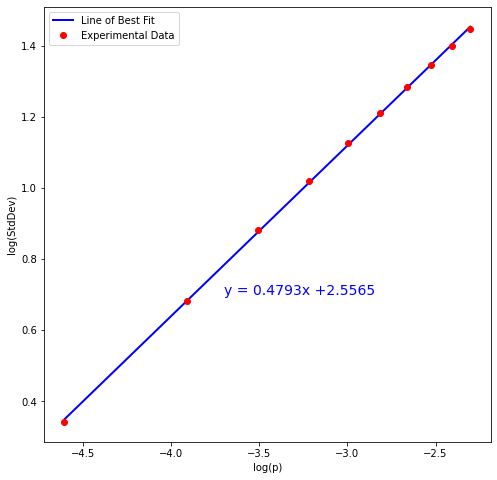

In [ ]:
### part c ###

# defines the same macrostate function
def macrostate(N,P,Q):
  n_1 = 0
  P_list = []
  n1_list = []
  for i in range(N+1):
    omega = int((factorial(N)) / ( (factorial(n_1))*(factorial(N-n_1)) ))
    P_macro = omega*(P**n_1)*(Q**(N-n_1))
    P_list.append(P_macro)
    n1_list.append(n_1)
    n_1 += 1
    
  return P_list, n1_list

N = 200
p_list = np.round(np.arange(0.01,0.11,0.01),2)

widths_list = []

# same for loop but with plotting instructions removed
for prob in p_list:
  q = 1 - prob
  Ps, ns = macrostate(N,prob,q)

  mean = 0
  var = 0
  for i in range(len(Ps)):
    mean += Ps[i]*ns[i]
  
  for i in range(len(Ps)):
      var += Ps[i]*(ns[i]-mean)**2

  width = math.sqrt(var)
  widths_list += [width]

# goes through the lists of widths and probs and converts those lists to logs
log_widths = np.asarray([math.log(x) for x in widths_list])
log_probs = np.asarray([math.log(y) for y in p_list])
a, b = np.polyfit(log_probs, log_widths, 1)

# plotting instructions
fig, axs = plt.subplots(1,1, figsize=(8,8))
axs.plot(log_probs, a*log_probs + b, label="Line of Best Fit",linewidth=2,color='blue')
axs.plot(log_probs, log_widths, "ro", label = "Experimental Data")
axs.set_xlabel("log(p)")
axs.set_ylabel("log(StdDev)")
axs.text(-3.7,0.7,"y = "+str(round(a,4))+"x +"+str(round(b,4)),color="blue", fontsize=14)
axs.legend()
plt.show()

### **Results & Discussion**

In viewing the output from my first cell of code, one will see that there are several different results to analyze. Looking first at the graph, we find that the resulting distribution functions for each of the probabilities all follow the same trend of taking on the shape of a Gaussian distribution. Qualatatively, the only differences between each of the distributions is the changing characteristics of the Gaussian; the mean and the width scaling. Specifically, as the probability $p$ increases, the distribution is shifted to the right, and is scaled wider. This lines up perfectly with what is expected in theory. By looking at either the plots, or checking the printed results for all parameters, we can prove this to be true. Take, as an example, the dark blue distribution curve for $p=0.05$. If we flip a coin 200 times, where each flip only has a probability of 0.05 of landing heads, we would expect in theory to observe $0.05\times200=10$ heads. Obviously this isn't always the case in reality, but it is however the *most likely* outcome. In other words, this is the mean or mode of our distribution. We can see that this holds true for the graphical output, and this same idea carries on for all of the different distributions and their corresponding probabilities.

The intuitive reasoning behind the fact that width of the distribution grows as the probability increases towards 0.5 is as follows. As we get closer to a 50/50 chance of heads or tails, it becomes less likely that we actually observe the theoretical outcome that is the mean of the distribution. Due to this, the results end up giving a larger spread, which causes the standard deviation (width) to grow. This is very similar to something I discussed in the previous problem and allows us to make a connection to entropy. For the higher probabilities (closer to 0.5) there are less ways in which we can actually achieve the theoretically more probabable results. This is what was causing our entropy calculations to vary less from the theoretical values for less biased coins. This same idea related to entropy holds true in this problem, and causes more variation in the mean as $p\rightarrow0.5$, which in itself is a quite interesting result.

Of course, all of this is also possible to derive mathematically, which as explained, I have also done in order to complete the conditions for part (b). All results of the mathematical computations are also printed in the output, and we can see that everything lines up nearly perfectly with what is expected theoretically.

Finally, one may also observe the results printed in my second code cell, which correspond to part (c) of this problem. It is obvious from the plot that there is a nearly perfectly linear relationship between the log of the width and the log of the probability. Given that the log-log relation is linear, we can first deduce that there is a power relation between the width and probability $p$. Specifically, we can analyze the slope of the line of best fit and find that the relationship is close to that of $\sigma\propto p^{1/2}$. This is easily obtained from the properties of logarithms, and the fact that the slope of our fitted line is approximately $1/2$. Given that in theory, by definition 

$$\sigma=\sqrt{Npq}=N^{1/2}p^{1/2}q^{1/2}\propto p^{1/2}$$

I was able to conclude that the results given by my program are quite accurate, as they confirm what is expected.

## **Problem 3 - Interacting Random Walkers**

### **Methodology**

In this problem, I was tasked with investigating the system of a 1-dimensional random walk, involving two random walkers. Specifically, I ran testing on this system for two different initial conditions; one in which the walkers occupied the same cell to start, and one in which they occupied adjacent cells. However, this problem was a little bit different to an elementary random walk, in which the probabilities for each walker to step left or right are equal. Instead, a 'repulsion factor', denoted by $\lambda$ was also introduced. An easy way to understand this repulsion factor is to imagine that each of the walkers represents a particle in 1D space. This repulsion factor can be thought of as the particle's tendancies to repel eachother more as they get closer. Thus, depending on the magnitude of $\lambda$, when the particles are separated by certain distances they may be more or less likely to move away from eachother. Specifically, when $\lambda=1$, there is absolutely no interaction between the particles, and when $\lambda=0$, there is a strong repelling force between them. Due to the nature of this system, from hereon out I use the terms walker and particle interchangably.

As mentioned, I analyzed this system for two different initial conditions, for each of which I varied $\lambda$ between $0$, $1/3$, $2/3$, and $1$. Therfore, I was able to analyze eight different systems in total, producing probability distributions for each.

As a simple demonstration of my random walk program at work, I also included a cell to simply print out the results of a basic random walk with two particles after each step.

To complete the overall goal of this problem, I started by defining a couple functions to carry out the random walk. In order to make sure that all probabilities were independent of one another, I opted to use two separate NumPy arrays to keep track of the position of each particle. Thus, when calling the master function to progress the random walk, I was able to access the locations of each particle as separate entities. Then to create the real lattice containing both a particles, I just had to sum the two individual arrays. Each array was simply filled with zeros, and the location of the particle represented by a one.

The evolve( ) function, which is called many times to progress the random walk by one step each time is quite lengthy, due to the complex nature of making sure that everything is independent. For each step, a random float between 0 and 1 is generated, which is used to determined how the particles are going to move. Next, I included four different conditional statements, in regard to the spacing of the particles. As mentioned, depending on how far apart they are, the particles may be more inclined to move towards or away from eachother, so this had to be accounted for. Within each of these conditions, are nested some more conditionals, this time designed to determined how the particle will move, according to the randomly generated number $r$. For each situation of particle spacing, the probabilities change, which is why there are so many different situations. One issue that I was running in to when I initially attempted this problem, was the fact that the program must also account for the order in which the particles appear (from left to right). In my initial method, I did not properly treat the particles as separate entities, and therefore when they passed eachother, they were actually *becoming* eachother. This is something that I mentioned previously, in which the probabilities get distorted and are not truly independent. To combat this, I was able to use the separate locations of each particles to check which order the particles appeared in the array.

Apart from the above intricacies, the remainder of the problem was quite simple to code. Using loops, I ran a random walk many times for each situation, storing the final result each time. Once this result was obtained I was left with a distribution of the number of occurances of particles for each cell. To convert this in to a probabilitiy distribution, I simply divided the distribution values by the number of random walks that were done, and again by 2 to account for the fact that there are two particles. In doing this, I was left with a probability distribution; specifically the probability distribution that a cell is occupied by a particle after $N$ steps.

I performed a couple more calculations in regard to the distributions, such as the mean and standard deviation / width, which are discussed more in depth in the section following my code. All that was really left to do was plot my distributions, to give the desired result of eight different probability distributions.

### **Code**

In [ ]:
# This cell just defines 4 functions, which are used to undergo
# each of the many random walks necessary for this problem.

# This function checks the location of each of the two walkers;
# it returns the positional index of each walker, as well as the
# distance separating them which is necessary for calculating
# the repulsion
def check_space(lat1, lat2):
  combined = lat1 + lat2

  if np.count_nonzero(combined == 1) == 2:
    loc1 = np.where(lat1 == 1)
    loc2 = np.where(lat2 == 1)
    indx1 = loc1[1][0]
    indx2 = loc2[1][0]
    space = abs(indx1 - indx2)

  elif np.count_nonzero(combined == 2) == 1:
    result = np.where(combined == 2)
    indx1, indx2 = result[1][0], result[1][0]
    space = 0

  return space, indx1, indx2

# This function takes a lattice for a given walker and shifts the positon
# of that walker to the right by one step
def right(lattice, indx):
  pos = indx
  lattice[0][pos] += -1
  lattice[0][pos+1] += 1
  return lattice

# This function takes a lattice for a given walker and shifts the position
# of that walker to the right by one step
def left(lattice, indx):
  pos = indx
  lattice[0][pos] += -1
  lattice[0][pos-1] += 1
  return lattice

# this is the master function that is called each time the full lattice 
# containing both walkers is updated. It takes the current locations and distance
# between walkers, as well as the individual walkers' lattices, and finally lambda
# as arguements. It is composed of many conditional statements, which are necessary
# to make sure that all probabilities are independent of eachother.
def evolve(space, lat1, lat2, indx1, indx2, lam):
  r = random.random()

  if space >= 3:
    if r < 0.25:
      lat1 = right(lat1, indx1)
      lat2 = right(lat2, indx2)
    if r >= 0.25 and r < 0.5:
      lat1 = left(lat1, indx1)
      lat2 = left(lat2, indx2)
    if r >= 0.5 and r < 0.75:
      lat1 = left(lat1, indx1)
      lat2 = right(lat2, indx2)
    if r >= 0.75 and r <= 1:
      lat2 = left(lat2, indx2)
      lat1 = right(lat1, indx1)

  if space == 2:
    if indx1 < indx2:
      if r < lam/4:
        lat1 = right(lat1, indx1)
        lat2 = left(lat2, indx2)
      if r >= lam/4 and r < (lam/4)+(1-lam/4)/3:
        lat1 = left(lat1, indx1)
        lat2 = right(lat2, indx2)
      if r >= (lam/4)+(1-lam/4)/3 and r < (lam/4)+2*(1-lam/4)/3:
        lat1 = left(lat1, indx1)
        lat2 = left(lat2, indx2)
      if r >= (lam/4)+2*(1-lam/4)/3 and r <= 1:
        lat1 = right(lat1, indx1)
        lat2 = right(lat2, indx2)

    if indx1 > indx2:
      if r < lam/4:
        lat2 = right(lat2, indx2)
        lat1 = left(lat1, indx1)
      if r >= lam/4 and r < (lam/4)+(1-lam/4)/3:
        lat2 = left(lat2, indx2)
        lat1 = right(lat1, indx1)
      if r >= (lam/4)+(1-lam/4)/3 and r < (lam/4)+2*(1-lam/4)/3:
        lat2 = left(lat2, indx2)
        lat1 = left(lat1, indx1)
      if r >= (lam/4)+2*(1-lam/4)/3 and r <= 1:
        lat2 = right(lat2, indx2)
        lat1 = right(lat1, indx1)

  if space == 1:
    if indx1 < indx2:
      if r < lam/4:
        lat1 = right(lat1, indx1)
        lat2 = left(lat2, indx2)
      if r >= lam/4 and r < (lam/4)+(1-lam/4)/3:
        lat1 = left(lat1, indx1)
        lat2 = right(lat2, indx2)
      if r >= (lam/4)+(1-lam/4)/3 and r < (lam/4)+2*(1-lam/4)/3:
        lat1 = left(lat1, indx1)
        lat2 = left(lat2, indx2)
      if r >= (lam/4)+2*(1-lam/4)/3 and r <= 1:
        lat1 = right(lat1, indx1)
        lat2 = right(lat2, indx2)

    if indx1 > indx2:
      if r < lam/4:
        lat2 = right(lat2, indx2)
        lat1 = left(lat1, indx1)
      if r >= lam/4 and r < (lam/4)+(1-lam/4)/3:
        lat2 = left(lat2, indx2)
        lat1 = right(lat1, indx1)
      if r >= (lam/4)+(1-lam/4)/3 and r < (lam/4)+2*(1-lam/4)/3:
        lat2 = left(lat2, indx2)
        lat1 = left(lat1, indx1)
      if r >= (lam/4)+2*(1-lam/4)/3 and r <= 1:
        lat2 = right(lat2, indx2)
        lat1 = right(lat1, indx1)

  if space == 0:
    if r < lam/4:
      lat1 = right(lat1, indx1)
      lat2 = right(lat2, indx2)
    if r >= lam/4 and r < 2*lam/4:
      lat1 = left(lat1, indx1)
      lat2 = left(lat2, indx2)
    if r >= 2*lam/4 and r < 2*lam/4 + (1/2 - lam/4):
      lat1 = right(lat1, indx1)
      lat2 = left(lat2, indx2)
    if r >= 2*lam/4 + (1/2 - lam/4) and r <=1:
      lat1 = left(lat1, indx1)
      lat2 = right(lat2, indx2)

  return lat1, lat2

In [ ]:
# This cell simply performs one random walk of N = 10 steps, and prints the resulting
# lattice after each step, just for a visual proof that the walk is progressing as
# expected. The lambda parameter (lam) can be varied to see different results
# but is currently set to 0.

N = 10
lam = 0

walker1 = np.zeros((1, 20))
walker2 = np.zeros((1, 20))
walker1[0][9] += 1
walker2[0][9] += 1

lattice = walker1 + walker2
print(" Initial\t",lattice)

for i in range(N):
  space, indx1, indx2 = check_space(walker1, walker2)
  walker1, walker2 = evolve(space, walker1, walker2, indx1, indx2, lam)
  lattice = walker1 + walker2
  print("")
  print(i+1,"step(s)\t",lattice)

 Initial	 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

1 step(s)	 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

2 step(s)	 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

3 step(s)	 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

4 step(s)	 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

5 step(s)	 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

6 step(s)	 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]

7 step(s)	 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]

8 step(s)	 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]

9 step(s)	 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

10 step(s)	 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


***NOTE:***

*The next several cells are just individual codes for the distributions for each lambda, first for the case where the walkers begin on the same cell, and then for the case where they start in adjacent cells.*

**Two Walkers Beginning on Same Cell**

Width = 9.9879
Mean = -0.0914



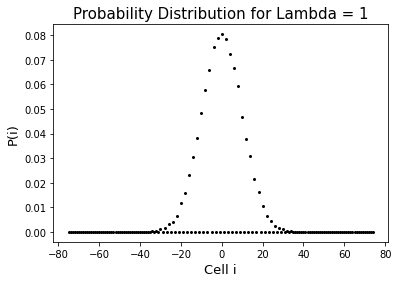

In [ ]:
# Same initial cell and lambda = 1

N = 100
nwalks = 20000
lam = 1
lat_wid = int(1.5*N)

results = np.zeros((1,lat_wid)) # list to keep track of results for creating distribution

# for loop that iterates nwalks times. In each loop a random walk is done and the results are stored
for walks in range(nwalks):
  walker1 = np.zeros((1, lat_wid))
  walker2 = np.zeros((1, lat_wid))
  walker1[0][lat_wid//2] += 1
  walker2[0][lat_wid//2] += 1

  # this loop completes one random walk of N steps
  for step in range(N):
    space, indx1, indx2 = check_space(walker1, walker2)
    walker1, walker2 = evolve(space, walker1, walker2, indx1, indx2, lam)

  lattice = walker1 + walker2
  results += lattice

# calculates the probabilities from the number of occurances of each location
probs = results[0] / (nwalks*2)
x_axis = np.arange((-lat_wid)//2,lat_wid//2,1)

# calculates the mean and width of the distribution
mean = sum(probs*x_axis)
width = math.sqrt(sum(probs * (x_axis - mean)**2))

# outputs results
print("Width =",round(width,4))
print("Mean =",round(mean,4))
print("")
plt.plot(x_axis, probs, "o", color="black", markersize=2, label="Random Walk Results")
plt.title("Probability Distribution for Lambda = "+str(round(lam,3)), fontsize = 15)
plt.xlabel("Cell i", fontsize=13)
plt.ylabel("P(i)", fontsize=13)
plt.show()

Width = 10.1782
Mean = -0.0496



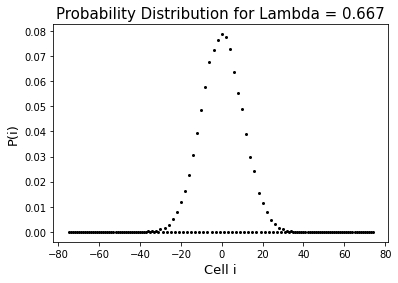

In [ ]:
# Same initial cell and lambda = 2/3

N = 100
nwalks = 20000
lam = 2/3
lat_wid = int(1.5*N)

results = np.zeros((1,lat_wid))

for walks in range(nwalks):
  walker1 = np.zeros((1, lat_wid))
  walker2 = np.zeros((1, lat_wid))
  walker1[0][lat_wid//2] += 1
  walker2[0][lat_wid//2] += 1

  for step in range(N):
    space, indx1, indx2 = check_space(walker1, walker2)
    walker1, walker2 = evolve(space, walker1, walker2, indx1, indx2, lam)

  lattice = walker1 + walker2
  results += lattice

probs = results[0] / (nwalks*2)
x_axis = np.arange((-lat_wid)//2,lat_wid//2,1)

mean = sum(probs*x_axis)
width = math.sqrt(sum(probs * (x_axis - mean)**2))

print("Width =",round(width,4))
print("Mean =",round(mean,4))
print("")
plt.plot(x_axis, probs, "o", color="black", markersize=2, label="Random Walk Results")
plt.title("Probability Distribution for Lambda = "+str(round(lam,3)), fontsize = 15)
plt.xlabel("Cell i", fontsize=13)
plt.ylabel("P(i)", fontsize=13)
plt.show()

Width = 10.3762
Mean = -0.0136



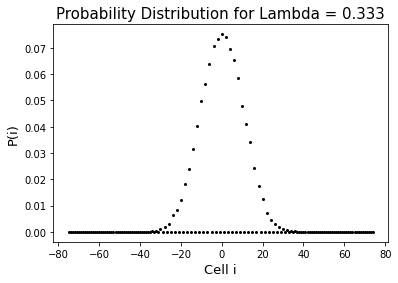

In [ ]:
# Same initial cell and lambda = 1/3

N = 100
nwalks = 20000
lam = 1/3
lat_wid = int(1.5*N)

results = np.zeros((1,lat_wid))

for walks in range(nwalks):
  walker1 = np.zeros((1, lat_wid))
  walker2 = np.zeros((1, lat_wid))
  walker1[0][lat_wid//2] += 1
  walker2[0][lat_wid//2] += 1

  for step in range(N):
    space, indx1, indx2 = check_space(walker1, walker2)
    walker1, walker2 = evolve(space, walker1, walker2, indx1, indx2, lam)

  lattice = walker1 + walker2
  results += lattice

probs = results[0] / (nwalks*2)
x_axis = np.arange((-lat_wid)//2,lat_wid//2,1)

mean = sum(probs*x_axis)
width = math.sqrt(sum(probs * (x_axis - mean)**2))

print("Width =",round(width,4))
print("Mean =",round(mean,4))
print("")
plt.plot(x_axis, probs, "o", color="black", markersize=2, label="Random Walk Results")
plt.title("Probability Distribution for Lambda = "+str(round(lam,3)), fontsize = 15)
plt.xlabel("Cell i", fontsize=13)
plt.ylabel("P(i)", fontsize=13)
plt.show()

Width = 10.5256
Mean = 0.0662



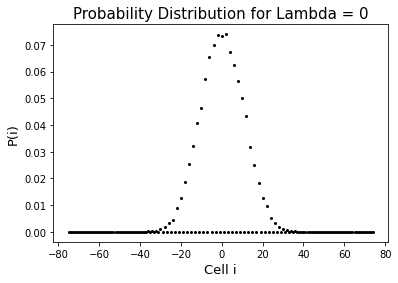

In [ ]:
# Same initial cell and lambda = 0

N = 100
nwalks = 20000
lam = 0
lat_wid = int(1.5*N)

results = np.zeros((1,lat_wid))

for walks in range(nwalks):
  walker1 = np.zeros((1, lat_wid))
  walker2 = np.zeros((1, lat_wid))
  walker1[0][lat_wid//2] += 1
  walker2[0][lat_wid//2] += 1

  for step in range(N):
    space, indx1, indx2 = check_space(walker1, walker2)
    walker1, walker2 = evolve(space, walker1, walker2, indx1, indx2, lam)

  lattice = walker1 + walker2
  results += lattice

probs = results[0] / (nwalks*2)
x_axis = np.arange((-lat_wid)//2,lat_wid//2,1)

mean = sum(probs*x_axis)
width = math.sqrt(sum(probs * (x_axis - mean)**2))

print("Width =",round(width,4))
print("Mean =",round(mean,4))
print("")
plt.plot(x_axis, probs, "o", color="black", markersize=2, label="Random Walk Results")
plt.title("Probability Distribution for Lambda = "+str(round(lam,3)), fontsize = 15)
plt.xlabel("Cell i", fontsize=13)
plt.ylabel("P(i)", fontsize=13)
plt.show()

**Two Walkers Beginning on Adjacent Cells**

Width = 9.9833
Mean = 0.5565



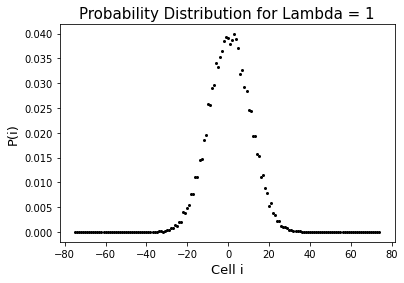

In [ ]:
# Adjacent initial cells and lambda = 1

N = 100
nwalks = 20000
lam = 1
lat_wid = int(1.5*N)

results = np.zeros((1,lat_wid))

for walks in range(nwalks):
  walker1 = np.zeros((1, lat_wid))
  walker2 = np.zeros((1, lat_wid))
  walker1[0][lat_wid//2] += 1
  walker2[0][lat_wid//2+1] += 1 # adjustment to start on adjacent cells

  for step in range(N):
    space, indx1, indx2 = check_space(walker1, walker2)
    walker1, walker2 = evolve(space, walker1, walker2, indx1, indx2, lam)

  lattice = walker1 + walker2
  results += lattice

probs = results[0] / (nwalks*2)
x_axis = np.arange((-lat_wid)//2,lat_wid//2,1)

mean = sum(probs*x_axis)
width = math.sqrt(sum(probs * (x_axis - mean)**2))

print("Width =",round(width,4))
print("Mean =",round(mean,4))
print("")
plt.plot(x_axis, probs, "o", color="black", markersize=2, label="Random Walk Results")
plt.title("Probability Distribution for Lambda = "+str(round(lam,3)), fontsize = 15)
plt.xlabel("Cell i", fontsize=13)
plt.ylabel("P(i)", fontsize=13)
plt.show()

Width = 10.1275
Mean = 0.4917



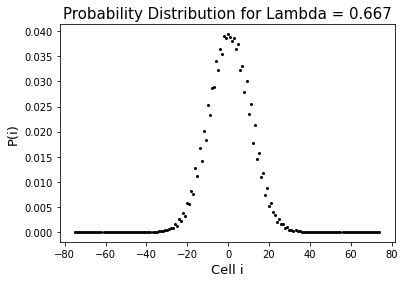

In [ ]:
# Adjacent initial cells and lambda = 2/3

N = 100
nwalks = 20000
lam = 2/3
lat_wid = int(1.5*N)

results = np.zeros((1,lat_wid))

for walks in range(nwalks):
  walker1 = np.zeros((1, lat_wid))
  walker2 = np.zeros((1, lat_wid))
  walker1[0][lat_wid//2] += 1
  walker2[0][lat_wid//2+1] += 1 # adjustment to start on adjacent cells

  for step in range(N):
    space, indx1, indx2 = check_space(walker1, walker2)
    walker1, walker2 = evolve(space, walker1, walker2, indx1, indx2, lam)

  lattice = walker1 + walker2
  results += lattice

probs = results[0] / (nwalks*2)
x_axis = np.arange((-lat_wid)//2,lat_wid//2,1)

mean = sum(probs*x_axis)
width = math.sqrt(sum(probs * (x_axis - mean)**2))

print("Width =",round(width,4))
print("Mean =",round(mean,4))
print("")
plt.plot(x_axis, probs, "o", color="black", markersize=2, label="Random Walk Results")
plt.title("Probability Distribution for Lambda = "+str(round(lam,3)), fontsize = 15)
plt.xlabel("Cell i", fontsize=13)
plt.ylabel("P(i)", fontsize=13)
plt.show()

Width = 10.1648
Mean = 0.5573



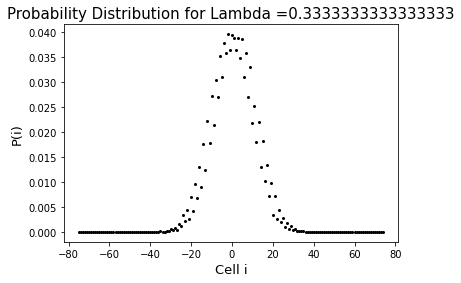

In [ ]:
# Adjacent initial cells and lambda = 1/3

N = 100
nwalks = 20000
lam = 1/3
lat_wid = int(1.5*N)

results = np.zeros((1,lat_wid))

for walks in range(nwalks):
  walker1 = np.zeros((1, lat_wid))
  walker2 = np.zeros((1, lat_wid))
  walker1[0][lat_wid//2] += 1
  walker2[0][lat_wid//2+1] += 1 # adjustment to start on adjacent cells

  for step in range(N):
    space, indx1, indx2 = check_space(walker1, walker2)
    walker1, walker2 = evolve(space, walker1, walker2, indx1, indx2, lam)

  lattice = walker1 + walker2
  results += lattice

probs = results[0] / (nwalks*2)
x_axis = np.arange((-lat_wid)//2,lat_wid//2,1)

mean = sum(probs*x_axis)
width = math.sqrt(sum(probs * (x_axis - mean)**2))

print("Width =",round(width,4))
print("Mean =",round(mean,4))
print("")
plt.plot(x_axis, probs, "o", color="black", markersize=2, label="Random Walk Results")
plt.title("Probability Distribution for Lambda ="+str(lam), fontsize = 15)
plt.xlabel("Cell i", fontsize=13)
plt.ylabel("P(i)", fontsize=13)
plt.show()

Width = 10.2869
Mean = 0.5665



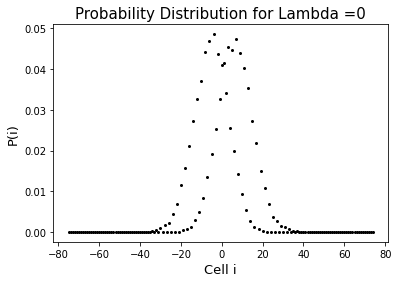

In [ ]:
# Adjacent initial cells and lambda = 0

N = 100
nwalks = 20000
lam = 0
lat_wid = int(1.5*N)

results = np.zeros((1,lat_wid))

for walks in range(nwalks):
  walker1 = np.zeros((1, lat_wid))
  walker2 = np.zeros((1, lat_wid))
  walker1[0][lat_wid//2] += 1
  walker2[0][lat_wid//2+1] += 1 # adjustment to start on adjacent cells

  for step in range(N):
    space, indx1, indx2 = check_space(walker1, walker2)
    walker1, walker2 = evolve(space, walker1, walker2, indx1, indx2, lam)

  lattice = walker1 + walker2
  results += lattice

probs = results[0] / (nwalks*2)
x_axis = np.arange((-lat_wid)//2,lat_wid//2,1)

mean = sum(probs*x_axis)
width = math.sqrt(sum(probs * (x_axis - mean)**2))

print("Width =",round(width,4))
print("Mean =",round(mean,4))
print("")
plt.plot(x_axis, probs, "o", color="black", markersize=2, label="Random Walk Results")
plt.title("Probability Distribution for Lambda ="+str(lam), fontsize = 15)
plt.xlabel("Cell i", fontsize=13)
plt.ylabel("P(i)", fontsize=13)
plt.show()

### **Results & Discussion**

For my results analysis, I will neglect to discuss the first output which just shows an evolving random walk example, as it is self explanatory. 

In analyzing all 8 probability distributions, I was able to confirm that my program ran correctly, using the mean and width scaling, and comparing to what they should be in theory. There were also a couple trends in the data which line up perfectly with what is expected.

First of all, one will notice that for both initial conditions, as $\lambda$ *decreases* the width of the probability distribution, $\sigma$ *increases*. This is easily suppported by the simple fact that as $\lambda$ increases, the particles are more likely to move away from eachother. Thus, there are going to be more outcomes in which the particles end up slightly more spread apart. Now, due to the fact that the particles only repel eachother when they are quite close, this increased spread of results is fairly small. However, in comparing the $\sigma$ values for different $\lambda$ I found that my program clearly follows this trend, confirming what is expected in theory.

In comparing the two initial conditions to eachother, I once again found interesting results that confirm what is expected in theory. In particular, the resulting Gaussians for the first four graphs, in which the particles began occupying the same space, have a single mode at the origin. This is expected, given that the probability distribution for a single walker has this same single mode, and we are essentially doing this distribution twice. Obviously, they differ in the fact that for the two walkers, separation is more likely, but the only result this has on the distribution is a slight widening, as well as a more rounded peak. In the case where there is no interaction, the result that we expect, and do indeed observe from my program, is essentially identical to that of a single particle undergoing a random walk. 

On the other hand, the case where the particles begin instead in adjacent cells is a bit different. In this situation, observe a distinct bimodal nature in the distributions. This bimodal property is also much more prominent as $\lambda$ decreases. This is completely expected, due to the fact that especially for higher $\lambda$ there is a strong tendancy for the particles to move away from eachother imediately after the walk begins. For this reason, the distribution actually results in two Gaussian's overlayed on top of eachother. In other words, the particle beginning on the left is more likely to end up left of the "origin", and vice versa. Notice my use of quotations for the word origin. This is due to the fact that in this case, I am considering the origin to be the point in between the two initial particle positions. Notice also that for this initial condition, in the case of the non interacting particles, the distribution is unimodal. This, once again, is expected due to the fact that the probabilities of moving left or right for each particle are always equal despite their separation. Therefore, we once again recover the probability distribution for a single random walker.

Overall, with these results alone, I was able to confirm that my program was giving the correct results. However, there are a couple small things that I may add, which have been derived from the graphical outputs. For one, let's consider the mean values of all distributions. We would expect these mean values to be at the origin for all cases, as the distributions should be symmetrical according to the previous theoretical notions previously discussed. In the case of the particles initially occupying the same space, we define the origin to be exactly at this space. In the case of my program, this space was set to be cell 0, which from the fact that the first four means are all approximately zero, confirms this suspicion. As for the means of the second set of four distributions, we define the origin to be exactly halfway between the two initial particle locations. In my case the initial locations were cell 0 and cell 1, which would imply that our mean is at 0.5. Observing the printed results from these distributions, I was once again able to confirm the validity of the program, as the means are all roughly 0.5.

Keeping all if this in mind, it is clear that my program was able to effectively produce accurate results for all probability distributions, and demonstrate what is expected in theory.


*Note that in the first four distributions, we see that under the Gaussian curve, every other probability is actually zero, this is just due to the nature of a random walk, if $N$ is even or odd, certain cells will never result in occupation by a particle. Also, in the last four distributions, the plots appear as two overlayed Gaussians instead of the summation of the two giving a more visually bimodal distribution. This occurs for the same reason, each of the particles can only end up on certain spots, which is why their distributions appear to just intersect instead of sum cumulatively.

## **Conclusion**

Overall, I was able to use Python in order to solve all three of the midterm problems. In the third problem, generating the distributions takes a bit of time, but nothing outrageous. Thus, if any testing is necessary or desired, they can easily be ran for your convenience.